_Lambda School Data Science_

# Regression Sprint Challenge

For this Sprint Challenge, you'll predict the price of used cars. 

The dataset is real-world. It was collected from advertisements of cars for sale in the Ukraine in 2016.

The following import statements have been provided for you, and should be sufficient. But you may not need to use every import. And you are permitted to make additional imports.

In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

[The dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv) contains 8,495 rows and 9 variables:

- make: manufacturer brand
- price: seller’s price in advertisement (in USD)
- body: car body type
- mileage: as mentioned in advertisement (‘000 Km)
- engV: rounded engine volume (‘000 cubic cm)
- engType: type of fuel
- registration: whether car registered in Ukraine or not
- year: year of production
- drive: drive type

Run this cell to read the data:

In [104]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.sample(10)

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
3704,30,9700.0,1,110,1.8,3,1,2007,0
8398,56,3999.0,2,1,2.0,3,1,1979,2
4134,57,7700.0,3,190,2.0,1,1,2007,0
423,33,37400.0,0,0,2.2,0,1,2016,1
466,55,12500.0,0,107,2.0,1,1,2008,1
5293,76,3200.0,3,140,1.6,1,1,2007,0
1790,74,32900.0,0,82,2.7,3,1,2013,1
166,42,30000.0,2,155,3.6,0,1,2008,1
3718,57,5350.0,5,188,1.9,0,1,2004,0
3507,17,3300.0,3,175,1.5,3,1,2007,0


In [105]:
df.isna().sum()

make            0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
drive           0
dtype: int64

In [106]:
df.describe()

,make,price,body,mileage,engV,engType,registration,year,drive
count,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000
mean,46.535491,16185.453305,2.302295,141.744202,2.568337,1.650618,0.941613,2006.500883,0.575868
std,24.526251,24449.641512,1.610307,97.464062,5.387238,1.341282,0.234488,6.925907,0.741235
min,0.000000,259.350000,0.000000,0.000000,0.100000,0.000000,0.000000,1959.000000,0.000000
25%,23.000000,5490.000000,1.000000,74.000000,1.600000,0.000000,1.000000,2004.000000,0.000000
50%,50.000000,9500.000000,3.000000,130.000000,2.000000,1.000000,1.000000,2008.000000,0.000000
75%,68.000000,17145.600000,3.000000,197.000000,2.500000,3.000000,1.000000,2011.000000,1.000000
max,82.000000,547800.000000,5.000000,999.000000,99.990000,3.000000,1.000000,2016.000000,2.000000


# Predictive Modeling with Linear Regression

## 1.1 Split the data into an X matrix and y vector (`price` is the target we want to predict).

In [134]:
features = ['drive','make', 'body', 'mileage', 'engV', 'engType', 'registration','year']
target = ['price']

X=df.copy()[features]
y=df.copy()[target]

## 1.2 Split the data into test and train sets, using `train_test_split`.
You may use a train size of 80% and a test size of 20%.

In [135]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=50)

In [136]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((6796, 8), (1699, 8), (6796, 1), (1699, 1))

## 1.3 Use scikit-learn to fit a multiple regression model, using your training data.
Use `year` and one or more features of your choice. You will not be evaluated on which features you choose. You may choose to use all features.

In [137]:
lin_reg= LinearRegression()
lin_reg.fit(Xtrain, ytrain)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.4 Report the Intercept and Coefficients for the fitted model.

In [138]:
beta_0 = lin_reg.intercept_
beta_i = lin_reg.coef_

print("Slope Coefficients: ", beta_i)
print("\nIntercept Value: ", beta_0)

Slope Coefficients:  [[ 8586.72417861   -37.65517874 -1614.94662551   -43.64298967
    309.15889188 -1140.34780676  4398.17638681  1148.18153219]]

Intercept Value:  [-2284036.93230084]


## 1.5 Use the test data to make predictions.

In [140]:
# Make predictions for y
y_predictions = lin_reg.predict(X_test)

## 1.6 Use the test data to get both the Root Mean Square Error and $R^2$ for the model. 
You will not be evaluated on how high or low your scores are.

In [158]:
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)

print('Root Mean Square Error: ' , rmse)
print('R Squared: ' , r2)

Root Mean Square Error:  21140.393258484244
R Squared:  0.281987425279152


## 1.7 How should we interpret the coefficient corresponding to the `year` feature?
One sentence can be sufficient

The coefficient corresponding to the 'year' indicates theslope of the 'year' feature from one point to the next on a regression line. In y = mx +b form it is the m.

## 1.8 How should we interpret the Root Mean Square Error?
One sentence can be sufficient

The RMSE is a measure of how well our model performed. It does this by measuring the difference between predicted values and the actual value, while our RMSE is approximately 21140 and its relatively high, indicating poor prediction. 

## 1.9 How should we interpret the $R^2$?
One sentence can be sufficient

The $R^2$ is relatively low at 0.28, indicating that the regression model is only 28% accurate based on the features or independent variables provided in our model. Thus it is a low accuracy regression model. 

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

(array([   2.,    3.,    9.,   18.,   28.,   52.,  122.,  165.,  262.,
         417.,  501.,  620.,  818., 1106., 1038.,  908.,  680.,  538.,
         337.,  281.,  214.,  128.,   89.,   82.,   34.,   22.,   12.,
           5.,    0.,    4.]),
 array([ 5.5581785 ,  5.8133614 ,  6.0685443 ,  6.3237272 ,  6.57891011,
         6.83409301,  7.08927591,  7.34445881,  7.59964171,  7.85482461,
         8.11000751,  8.36519041,  8.62037331,  8.87555622,  9.13073912,
         9.38592202,  9.64110492,  9.89628782, 10.15147072, 10.40665362,
        10.66183652, 10.91701943, 11.17220233, 11.42738523, 11.68256813,
        11.93775103, 12.19293393, 12.44811683, 12.70329973, 12.95848263,
        13.21366554]),
 <a list of 30 Patch objects>)

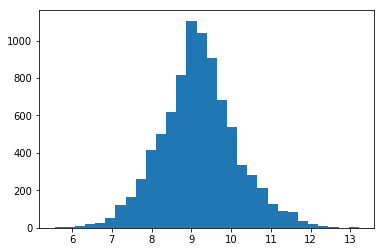

In [161]:
df['ln_price'] = np.log(df['price'])

plt.hist(df['ln_price'], bins=30)

## 2.2 Visualize scatterplots of the relationship between each feature versus the log of price, to look for non-linearly distributed features.
You may use any plotting tools and techniques.

In [162]:
df.columns

Index(['make', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'drive', 'ln_price'],
      dtype='object')

In [168]:
features = ['make','body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'drive']

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


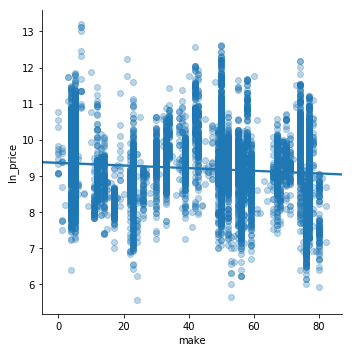

In [172]:
sns.lmplot('make', 'ln_price', data=df, scatter_kws=dict(alpha=0.3))
plt.show()

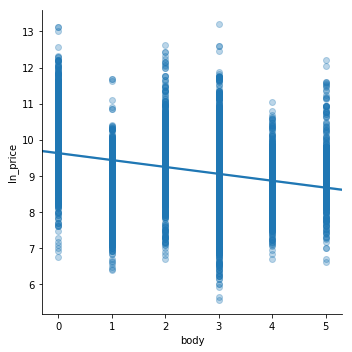

In [173]:
sns.lmplot('body', 'ln_price', data=df, scatter_kws=dict(alpha=0.3))
plt.show()

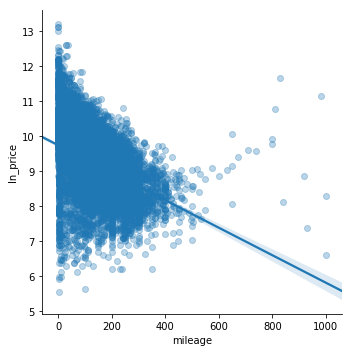

In [174]:
sns.lmplot('mileage', 'ln_price', data=df, scatter_kws=dict(alpha=0.3))
plt.show()

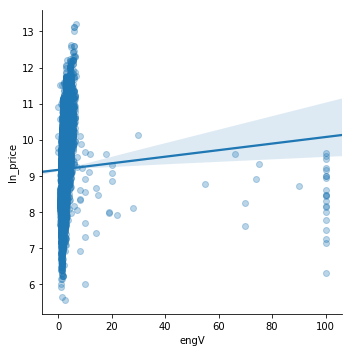

In [175]:
sns.lmplot('engV', 'ln_price', data=df, scatter_kws=dict(alpha=0.3))
plt.show()

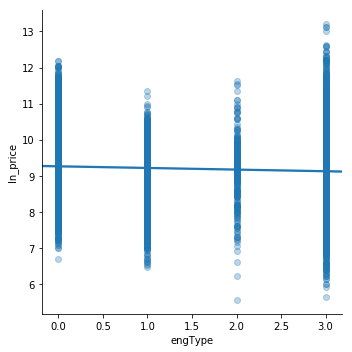

In [176]:
sns.lmplot('engType', 'ln_price', data=df, scatter_kws=dict(alpha=0.3))
plt.show()

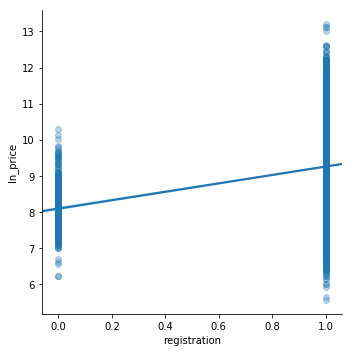

In [177]:
sns.lmplot('registration', 'ln_price', data=df, scatter_kws=dict(alpha=0.3))
plt.show()

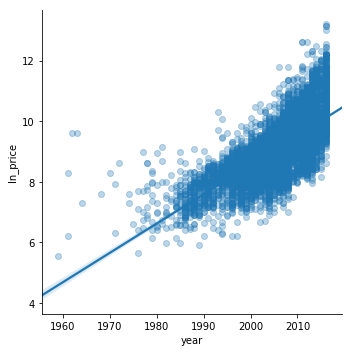

In [178]:
sns.lmplot('year', 'ln_price', data=df, scatter_kws=dict(alpha=0.3))
plt.show()

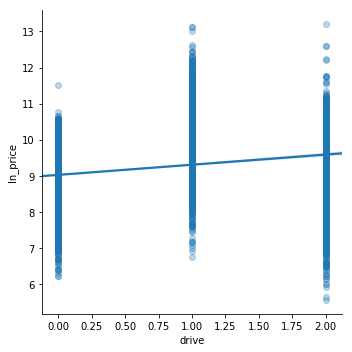

In [179]:
sns.lmplot('drive', 'ln_price', data=df, scatter_kws=dict(alpha=0.3))
plt.show()

## 2.3 Create polynomial feature(s)
You will not be evaluated on which feature(s) you choose. But try to choose appropriate features.

In [181]:
df['engV_sq'] = df['engV']**2
df['mileage_sq'] = df['mileage']**2

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [186]:
# Polynomial Features
polynomial_feat = ['engV_sq','mileage_sq']

# Set feature and target
target = df['ln_price']
feature = df[polynomial_feat]

#Train/Test Split
xtrain, xtest, ytrain, ytest = train_test_split(feature, target, test_size = .2)

#Set/Fit Model
linreg = LinearRegression()
linreg.fit(feature, target)

# Intercept/Coefficient
beta_0 = linreg.intercept_
beta_1 = linreg.coef_
print("Slope Coefficients: ", beta_1)
print("Intercept Value: ", beta_0)

# RMSE
print('Root Mean Squared Error', np.sqrt(mean_squared_error(target, linreg.predict(feature))))

# R^2
print('R-Squared Value', linreg.score(feature, target))

Slope Coefficients:  [-7.93188169e-09 -2.18532836e-12]
Intercept Value:  9.19573250433777
Root Mean Squared Error 0.9593264209467586
R-Squared Value 0.005077839984796051


## 2.5 How do we interpret coefficients in Log-Linear Regression (differently than Ordinary Least Squares Regression)?
One sentence can be sufficient

The coefficients indicate that one unit increase in X will produce an expected increase in log Y (target) units

# Decision Trees

## 3.1 Use scikit-learn to fit a decision tree regression model, using your training data.
Use one or more features of your choice. You will not be evaluated on which features you choose. You may choose to use all features.

You may use the log-transformed target or the original un-transformed target. You will not be evaluated on which you choose.

In [189]:
# Train/Test Split
X = df.drop(['price','ln_price'], axis=1)
y = df['ln_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=42)

In [190]:
# Make Tree Model and Fit
tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

## 3.2 Use the test data to get the $R^2$ for the model. 
You will not be evaluated on how high or low your scores are.

In [191]:
print('R^2 Score: ', tree.score(X_test, y_test))

R^2 Score:  0.8839889650792476


# Regression Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [192]:
# OLS Model Summary

model = sm.OLS(y, sm.add_constant(X))
results = model.fit(cov_type='HC3')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     1442.
Date:                Fri, 03 May 2019   Prob (F-statistic):               0.00
Time:                        10:22:59   Log-Likelihood:                -7173.5
No. Observations:                8495   AIC:                         1.437e+04
Df Residuals:                    8484   BIC:                         1.445e+04
Df Model:                          10                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -186.6376      3.483    -53.582   

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 9
  'rank is %d' % (J, J_), ValueWarning)


## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. 

### Do we have multicollinearity problems?
One sentence can be sufficient

In [195]:
# VIF 
X = sm.add_constant(X)

vif = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

pd.Series(vif, X.columns)

const            0.000000
make             1.059846
body             1.151328
mileage          3.715342
engV            58.721493
engType          1.139643
registration     1.093379
year             1.456740
drive            1.127538
engV_sq         58.711215
mileage_sq       2.994032
dtype: float64

In [ ]:
# There is a big multicollinearity problem here. We will ignore engV, engV_sq. 